# 16 - Regresion Lineal Simple


* En este Notebook vamos a ver que es la Regresión Lineal y como se implementaría con la técnica del gradiente descendente:
<span></span><br>
    1. [Regresión Lineal](#M1)
<span></span><br>
    2. [Gradiente Descendente: Regresión Lineal Simple](#M2)
<span></span><br>
    3. [Pseudocódigo del Gradiente Descendente para la Regresión Lineal Simple](#M3)
<span></span><br>
    4. [Implementación: Regresión Lineal](#M4)
<span></span><br>
    5. [Ejemplo de Regresión Lineal](#M5)
    
<hr>

# <a name="M1">1. Regresión Lineal</a>

* La regresión lineal es uno de los algoritmos clásicos más extendidos y fáciles de entender.


* Lo que se pretende hacer es ***modelar la relación*** que existe ***entre*** una ***variable dependiente <span style="color:blue; font-size:18px">Y</span>*** y ***una o más variables independientes <span style="color:blue; font-size:18px">X</span>***:


<img src="./imgs/15_01_rls.png" style="width: 200px;"/>


* Donde ***a y b*** son dos constantes (coeficientes o parámetros del modelo lineal) que definen, respectivamente, ***la pendiente y el término independiente*** (u ordenada en el origen).


* La regresión lineal la podemos imaginar como un problema que consiste en ***obtener la línea azul (y = aX+b) que mejor se ajusta a los puntos rojos dados*** en la imagen.


<img src="./imgs/15_02_rls.png" style="width: 400px;"/>


* Para obtener esta línea azul, podemos usar ***métodos como el de los mínimos cuadrados***, que busca minimizar la distancia vertical de todos los puntos rojos a la línea azul.


* El calcular por ***mínimos cuadrados*** la relación entre las variables dependientes (Y) e independientes (X) es ***muy costoso computacionalmente*** y por tanto si lo tenemos que hacer para muchos datos, el tiempo que se necesita para obtener el resultado puede ser "infinito".


* El objetivo del ***Machine Learning*** es el de poder dar esta relación (modelo o hipótesis) en un ***tiempo razonable***,  utilizando ***técnicas y algoritmos que permitan obtener la mejor aproximación posible***.


<hr>


# <a name="M2">2. Gradiente Descendente: Regresión Lineal Simple</a>


* Una de las técnicas utilizadas para obtener la relación entre X e Y es la del ***gradiente descendente***.


* Dada la hipótesis ***y = aX+b***, el objetivo es el de ***calcular los parámetros ‘a’ y ‘b’ que mejor ajusten la recta a los datos de entrenamiento***.


* Para obtener estos parámetros y poder ajustar correctamente la recta necesitamos ***definir una función de perdida (o función de coste)*** que nos diga cual es nuestro ***error para los datos de entrenamiento***, dado un par de valores concretos de ‘a’ y ‘b’.


* El ***error*** (error para un ejemplo concreto) y la ***función de perdida*** (el error de todos los ejemplos del conjunto de datos de entrenamiento) suelen ser los siguientes para los problemas de regresión:
<span></span><br><br>
    - **<span style="color:red">Error:</span>**<br><br>
    <span style="font-size:20px">$$error(x^{(i)},y^{(i)},a,b) = (a \cdot x^{(i)} + b) - y^{(i)}$$</span>
<span></span><br><br> 
    o definiendo: $h(x) = a \cdot x + b$, definimos el error como:<br><br>
    <span style="font-size:20px">$$error(h(x^{(i)}), y^{(i)}) = h(x^{(i)}) - y^{(i)}$$</span>
<span></span><br><br> 
    - **<span style="color:red">Función de Perdida:</span>**<br><br>
    <span style="font-size:20px">$$función\;perdida = E(parámetros) = \frac{1}{2N} \sum_{i=1}^{N} error(h(x^{(i)}), y^{(i)})^2$$</span>
    
<span></span><br><br>   
* Por tanto el objetivo de la Regresión Lineal es el de ***encontrar los parámetros ‘a’ y ‘b’ que minimicen la función de perdida***:

<span></span><br><br> 
    <span style="font-size:20px">$$\underset{a,b}{min} \: E(a,b) = \frac{1}{2N} \sum_{i=1}^{N} ((a \cdot x^{(i)} + b) - y^{(i)})^2$$</span>
<span></span><br><br>   


* La técnica del gradiente descendente consiste en ***derivar de forma parcial la función de perdida para cada uno de los parámetros (‘a’ y ‘b’) y moverse una determinada cantidad (α) en el sentido contrario a la pendiente de la derivada***, con el objetivo de encontrar los parámetros (‘a’ y ‘b’) que minimicen la función de perdida:
<span></span><br><br>   
    <span style="font-size:20px">$$\Theta^{new}_{j} := \Theta^{old}_{j} - \alpha  \frac{\partial }{\partial \Theta_j}E(\Theta_0,...,\Theta_j)$$</span>
    
    
* Para el caso de una ***regresión lineal simple del estilo $y = a \cdot x + b$*** tenemos que encontrar los ***mejores valores de 'a' y 'b'*** que minimicen la función de perdida.


* Para ello ***necesitamos tener un modelo o hipótesis inicial*** que podemos generar de diferentes maneras (por ejemplo de forma aleatoria) y ***tener unos valores iniciales de 'a' y 'b' que vayamos ajustando en función del error cometido***.


* La ***forma de ajustar estos valores de 'a' y 'b' seria derivando de manera parcial la función de perdida respecto a 'a' y 'b'***, quedando esta actualización de la siguiente forma:
<span></span><br><br>   
    <span style="font-size:20px">$$a^{new} := a^{old} - \alpha  \frac{1}{N}\sum_{i=1}^{N} ((a^{old} \cdot x^{(i)} + b^{old}) - y^{(i)}) \cdot x^{(i)}$$</span>
<span></span><br><br>   
    <span style="font-size:20px">$$b^{new} := b^{old} - \alpha  \frac{1}{N}\sum_{i=1}^{N} ((a^{old} \cdot x^{(i)} + b^{old}) - y^{(i)})$$</span>
<span></span><br><br>


* Cada vez que actualizamos los parámetros 'a' y 'b' lo hacemos tras haber visto el error cometido por cada uno de los elementos de nuestro Dataset (o conjunto de entrenamiento). ***El recorrer todos los elementos del Dataset, ver el valor de la función de perdida y actualizar los parámetros, se conoce como <span style="color:red">'Epoch'</span>***.


* La actualización de los parámetros 'a' y 'b' se hace en cada Epoch, realizando tantos Epochs como sean necesarios hasta que lleguemos a una ***condición de parada*** como por ejemplo:

    - Haber realizado 'N' Epochs
    - El valor de la función de perdida entre una iteración y otra sea el mismo.
    - El valor de la función de perdida entre una iteración y otra tengan una diferencia inferior a un umbral definido.
    - El valor de los parámetros 'a' y 'b' entre una iteración y otra tengan una diferencia inferior a un umbral definido.
    - Etc.
    
    
* El hiperparámetro **<span style="color:red">$\alpha$</span>** se conoce como **<span style="color:red">'Learning Rate'</span>** y nos indica la cantidad (α) en el que el gradiente descentente tiene que moverse en el sentido contrario a la pendiente de la derivada. En otras palabras, nos ***indicar 'cuanto' se ajusta el modelo o hipótesis en cada uno de los 'Epochs'***.


* El hiperparámetro ***$\alpha$</span> es un valor "constante" que debe de asignarse previo a la ejecución***. Por simplicidad en este curso lo consideraremos como constante, pero existen técnicas (como el recocido simulado entre otras) que optimizan el valor de $\alpha$ para cada epoch.


<hr>


# <a name="M3">3. Pseudocódigo del Gradiente Descendente para la Regresión Lineal Simple</a>


* Los pasos a dar para obtener el modelo o hipótesis para un problema de regresión lineal sería el siguiente:

    1. Definir valor de $\alpha$
    2. Definir número de Epochs
    3. Definir condición de parada
    4. Generar modelo o hipótesis inicial (de manera aleatoria por ejemplo)
    5. Mientras no haya condición de parada ejecutar Epochs:
        - Calculamos valor de la función de perdida para el modelo o hipótesis 'old'
        - Generamos nuevo modelo o hipótesis 'new' actualizando los parámetros 'a' y 'b'
        

* Pseudocódigo:


```python
alpha = 0.01
num_epochs = 100
condicion_parada = True

# inicializamos modelo
a_new = random()
b_new = random()

it_counter = 0
while condicion_parada and it_counter < num_epochs:
    
    # Reasignamos parámetros
    a_old = a_new
    b_old = b_new
    
    # Inicializamos errores a cero
    funcion_perdida = 0
    sum_a = 0
    sum_b = 0
    
    # Recorremos el Dataset para calcular los errores
    for i in dataset:
        hipotesis_i = (a_old * x[index]) + b_old 
        error_i = hipotesis_i - y[index]
        funcion_perdida += error_i^2
        sum_a += error_i * x[i]
        sum_b += error_i
    
    # Actualizamos los valores de los parámetros
    a_new = a_old - (alpha * 1/len(dataset) * sum_a)
    b_new = b_old - (alpha * 1/len(dataset) * sum_b)
    
    # Calculamos el valor de la función de perdida del epoch
    funcion_perdida = funcion_perdida / 2*len(dataset)
    
    it_counter+= 1
```


<hr>


# <a name="M4">4. Implementación: Regresión Lineal</a>


* En el siguiente fragmento de código, esta implementado la ***regresión lineal simple con el gradiente descendente***, siguiendo el Pseudocódigo mostrado anteriormente junto con alguna lógica programática adicional.



In [1]:
import random
import math
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 


def print_iteration_status(epoch, a, b, funcion_perdida):
    """
    Función que imprime por pantalla el resultado del epoch:
        - epoch: número del epoch.
        - a: parámetro 1.
        - b: parámetro 2.
        - funcion_perdida: Valor de la función de perdida.
    """
    print ('\nEpoch {}'.format(epoch))
    print ('\t Y = {a:0.4f} X + {b:0.4f}'.format(a=a, b=b))
    print ('\tFunción de Perdida = {:0.4f}'.format(funcion_perdida))

    
def is_convergence(a_new, b_new, a_old, b_old, tolerance):
    """
    Función que recibe como argumentos los parámetros antiguos y nuevos de la regresión 
    y compara los valores para ver si estan por debajo de un umbral y activar la condición
    de parada.
        - a_new: nuevo valor del parámetro a
        - b_new: nuevo valor del parámetro b
        - a_old: antiguo valor del parámetro a
        - b_old: antiguo valor del parámetro b
        - tolerance: Valor de tolerancia
    """
    return math.fabs(a_new - a_old) < tolerance and \
           math.fabs(b_new - b_old) < tolerance


def linear_regression(X, y, alpha, num_epochs, tolerance, verbose=False):
    """
    Función que devuelve el modelo o hipótesis de la regresión y la función de perdida por epoch, 
    recibiendo como parámetros:
        - X: Valores de la variable independiente.
        - y: Valores de la variable dependiente.
        - alpha: Learning Rate.
        - num_epochs: Número máximo de epochs.
        - tolerance: Valor de tolerancia de los parámetros para la condición de parada.
        - verbose: Boolean para indicar si queremos imprimir por pantalla el estado del epoch.
    """
    
    # Inicializamos los parámetros de manera aleatoria
    a_new, b_new = (random.randrange(0, 10),) * 2
    a_old, b_old = (tolerance,) * 2
    
    # Contador de Eposchs
    it_counter = 0
    
    # Guardamos en una lista los errores cometidos en cada Epoch
    errores = []
    
    # Epochs
    while not is_convergence(a_new, b_new, a_old, b_old, tolerance) and it_counter < num_epochs:
        
        # Reasignamos los valores de los parámetros del epoch anterior
        a_old = a_new
        b_old = b_new
        
        # Inicializamos a cero la función de perdida para cada parámetro
        funcion_perdida = 0
        sum_a = 0
        sum_b = 0
        
        # Recorremos el Dataset para ver los errores cometidos
        for index, elem in enumerate(X):
            hipotesis = (a_old * X[index]) + b_old    # Resultado del modelo o hipótesis
            error_i = hipotesis - y[index]            # Error cometido en la predicción
            funcion_perdida += math.pow(error_i, 2)   # Acumulamos el error a la función de perdida
            sum_a += error_i * X[index]               # Acumulado del error por el valor de X (para cálculo de a_new)
            sum_b += error_i                          # Acumulado del error (para cálculo de b_new)
        
        # Actualizamos Parámetros
        a_new = a_old - ((alpha / len(X)) * sum_a)
        b_new = b_old - ((alpha / len(X)) * sum_b)
        
        # Calculamos el error 
        funcion_perdida = funcion_perdida / (2 * len(X))
        errores.append(funcion_perdida)
        
        # Incrementamos contador de Epochs
        it_counter += 1
        
        # Imprimimos el estado de la interacción
        if verbose:
            print_iteration_status(it_counter, a_new, b_new, funcion_perdida)
    
    return a_new, b_new, errores

<hr>


# <a name="M5">5. Ejemplo de Regresión Lineal</a>


* Dado un ***conjunto de datos***, obtenidos de forma empírica en el que se muestra cuantas ***calorías quema una persona en función de los minutos que corre***, se pretende encontrar la ***relación entre minutos-calorías***:


<span style="font-size:16px">$Calorias = a \cdot Tiempo + b$</span>


* Veamos a continuación el conjunto de datos:

In [2]:
import pandas as pd
df = pd.read_csv("./data/calorias_running/calories_time_reduc.csv")
df.sample(5)

,Calories,Time
29,749.3,40.1
68,291.6,24.6
10,997.7,71.3
47,696.0,39.7
71,212.0,8.7


* Por tanto tenemos:
    - ***y***: Calories
    - ***X***: Time
    
    
* Podemos ver la relación entre los minutos corridos y las calorías:

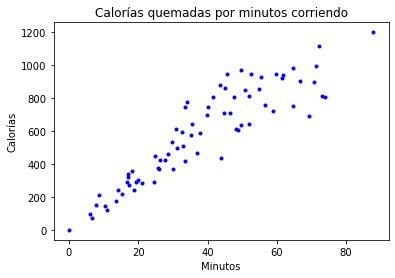

In [3]:
# Pasamos los valores a un numpy array
X = df['Time'].values
y = df['Calories'].values

# Creamos la gráfica y visualizamos la relación entre minutos y calorías.
fig, ax =  plt.subplots(figsize=(6, 4))
ax.scatter(X, y,  color='blue', marker='.', )
ax.set_title("Calorías quemadas por minutos corriendo")
ax.set_xlabel("Minutos")
ax.set_ylabel("Calorías")
plt.show()

* A continuación vamos a ajustar el modelo para obtener la relación entre las calorías quemadas por minutos corriendo.


* Para ello vamos ha hacer uso de la implementación de la regresión lineal con el gradiente descendente, pasándole los siguientes parámetros:

    - X: Minutos (Variable Independiente)
    - y: Calorías (Variable Dependiente)
    - Learning Rate: 0.0001
    - num_epochs: 50
    - tolerancia sobre los parámetros: 0.01
    - Verbose: True para ver la evolución

In [4]:
a, b, errores = linear_regression(X=X, y=y, alpha=0.0001, num_epochs=50, tolerance=0.01, verbose=True)


Epoch 1
	 Y = 10.0441 X + 9.0230
	Función de Perdida = 36514.2953

Epoch 2
	 Y = 10.8928 X + 9.0420
	Función de Perdida = 26627.8954

Epoch 3
	 Y = 11.5826 X + 9.0577
	Función de Perdida = 20096.2505

Epoch 4
	 Y = 12.1433 X + 9.0708
	Función de Perdida = 15780.9877

Epoch 5
	 Y = 12.5990 X + 9.0817
	Función de Perdida = 12930.0196

Epoch 6
	 Y = 12.9694 X + 9.0908
	Función de Perdida = 11046.4654

Epoch 7
	 Y = 13.2705 X + 9.0986
	Función de Perdida = 9802.0516

Epoch 8
	 Y = 13.5152 X + 9.1052
	Función de Perdida = 8979.8978

Epoch 9
	 Y = 13.7141 X + 9.1108
	Función de Perdida = 8436.7181

Epoch 10
	 Y = 13.8758 X + 9.1157
	Función de Perdida = 8077.8479

Epoch 11
	 Y = 14.0072 X + 9.1200
	Función de Perdida = 7840.7453

Epoch 12
	 Y = 14.1140 X + 9.1237
	Función de Perdida = 7684.0907

Epoch 13
	 Y = 14.2008 X + 9.1271
	Función de Perdida = 7580.5856

Epoch 14
	 Y = 14.2713 X + 9.1301
	Función de Perdida = 7512.1947

Epoch 15
	 Y = 14.3286 X + 9.1328
	Función de Perdida = 7467.002

## Resultados


* Tras la ejecución de la regresión lineal tenemos como resultado un modelo o hipótesis en el que ya conocemos los valores de los parámetros 'a' y 'b'.


* En la siguiente gráfica podemos ver las relaciones entre los minutos corridos y las calorías quemadas, asi como la recta de regresión:

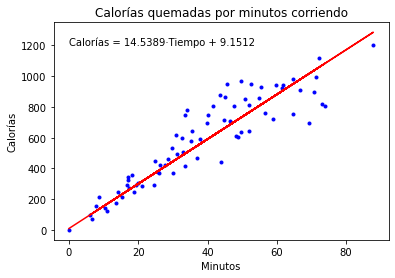

In [5]:
fig, ax =  plt.subplots(figsize=(6, 4))
ax.scatter(X, y,  color='blue', marker='.', )
ax.plot(X, [(a*x + b) for x in X], color='red')
ax.set_title("Calorías quemadas por minutos corriendo")
ax.set_xlabel("Minutos")
ax.set_ylabel("Calorías")
ax.text(0, 1200,"Calorías = {a:0.4f}·Tiempo + {b:0.4f}".format(a=a, b=b))
plt.show()

* Podemos observar tambien como evoluciona la función de perdida por epoch, viendo como en cada epoch el error es menor que en el epoch anterior:

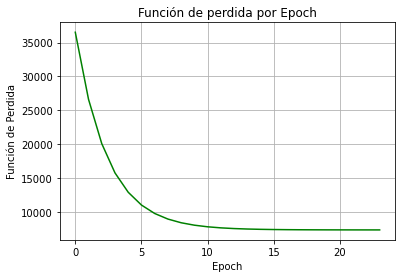

In [6]:
fig, ax =  plt.subplots(figsize=(6, 4))
ax.plot([index for index, value in enumerate(errores)], [error for error in errores], color='green')
ax.set_title("Función de perdida por Epoch")
ax.set_xlabel("Epoch")
ax.set_ylabel("Función de Perdida")
ax.grid(True)
plt.show()

<hr>

*Este Notebook ha sido desarrollado por **Ricardo Moya García** y registrado en Safe Creative como ***Atribución-NoComercial-CompartirIgual***.*

<img src="./imgs/CC_BY-NC-SA.png" alt="CC BY-NC">